In [1]:
import pandas as pd
import numpy as np

# Load your merged dataset (ensure the filename is correct)
df = pd.read_csv('tested.csv')

# 1. View the first few rows
print("--- First 5 Rows ---")
print(df.head())

# 2. Check data types and non-null counts
print("\n--- Data Info ---")
df.info()

# 3. Get descriptive statistics for numerical columns
print("\n--- Statistical Summary ---")
print(df.describe())

# 4. Identify missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [2]:
# 1. Handle Missing Values
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill one missing 'Fare' value (if present) with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)
# Drop the 'Cabin' column because it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# 2. Feature Engineering
# Create a FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Create an IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# 3. Categorical Feature Encoding
# Convert 'Sex' and 'Embarked' into numerical dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verify that all data is now numeric and there are no missing values
print("\n--- Cleaned Data Info ---")
df.info()


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   FamilySize   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
 11  Sex_male     418 non-null    bool   
 12  Embarked_Q   418 non-null    bool   
 13  Embarked_S   418 non-null    bool   
dtypes: bool(3), float64(2), int64(7), object(2)
memory usage: 37.3+ KB


/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_51883/2947852025.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_51883/2947852025.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

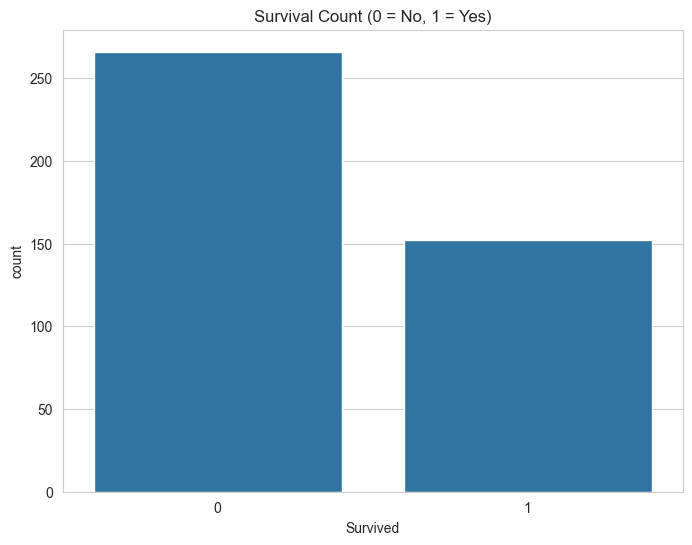

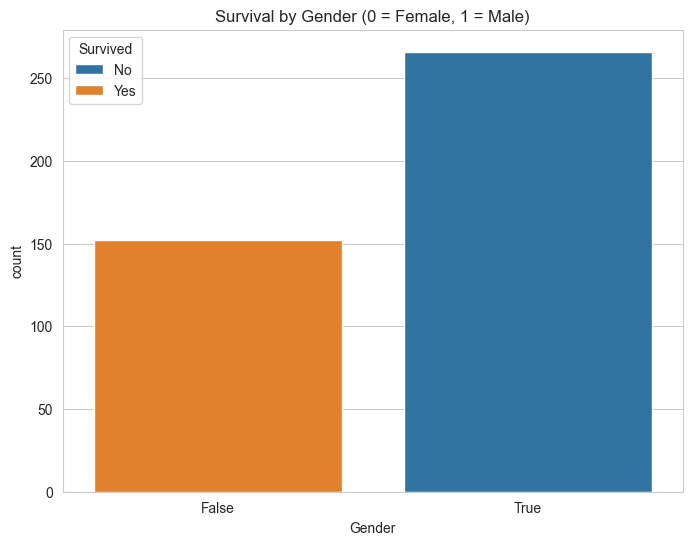

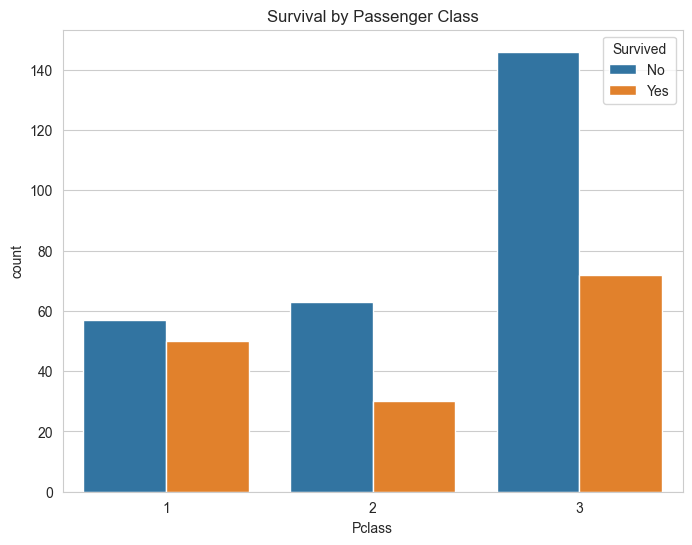

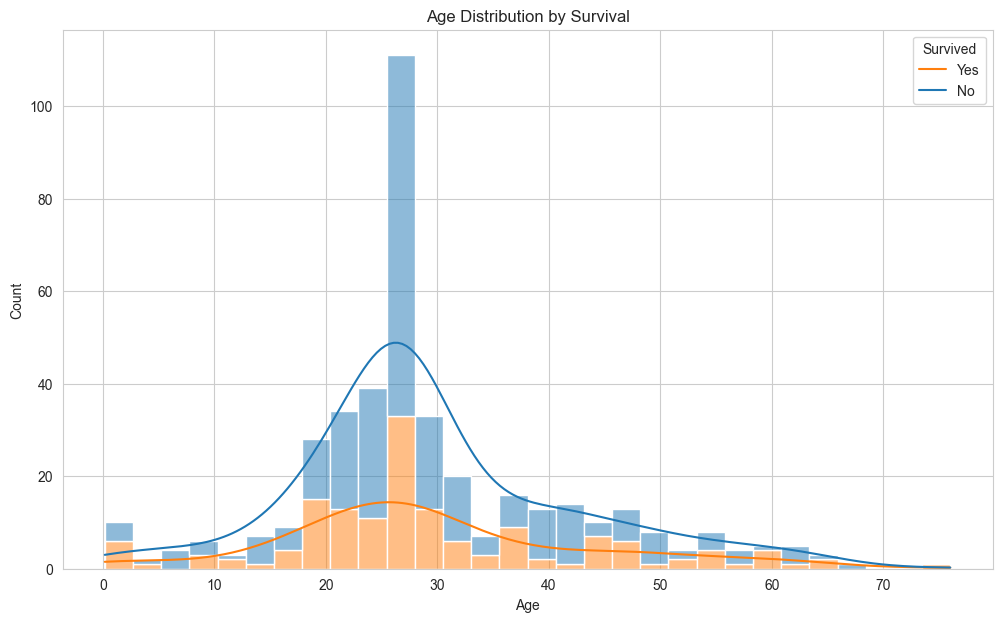

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# 1. Target Variable Distribution: How many survived?
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# 2. Feature-Target Relationships
# Survival by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title('Survival by Gender (0 = Female, 1 = Male)')
plt.xlabel('Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival by Age
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Define Features (X) and Target (y)
# Drop the original text columns and identifiers
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

# 2. Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train Model
# Increase max_iter if you see a convergence warning
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("--- Model training complete ---")

--- Model training complete ---
